In [9]:
from __future__ import print_function, division
import os

import numpy as np
import pandas as pd
# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 500) 
pd.set_option('display.max_columns', 60) 
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
import networkx as nx
from math import sqrt
SPINE_COLOR = 'gray'
%matplotlib inline

matplotlib.rcParams['axes.edgecolor'] = '606060' # 'white'
matplotlib.rcParams['figure.dpi'] = 100  # figure dots per inch
matplotlib.rcParams['axes.titlesize'] = 'large' # 'large'
matplotlib.rcParams['axes.labelsize'] = 'medium' #'small' 
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['axes.facecolor'] = '#ffffff' ############# gb
matplotlib.rcParams['savefig.dpi'] = 100

# Avoid type 3 fonts (for submissions) ****
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# home_dir = '/research/doaa2012/'
home_dir = '/Users/doaa/Documents/'
base_dir = home_dir + 'LASCAD/'
result_files_dir = 'Figs_SEclassification/paper_results/'
fig_base_dir = base_dir + 'Figs_SEclassification/'

/Users/doaa/anaconda3/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


(1024, 8)


,Dataset,n_clusters,NUM_TOPICS,max_df,min_df,precision,recall,f-score
416,showcase_noStem2,70.0,125.0,0.6,0.2,81.3,92.2,86.4
380,showcase_noStem2,60.0,125.0,0.6,0.2,80.4,91.3,85.5
394,showcase_noStem2,60.0,150.0,0.7,0.1,79.1,90.3,84.3
358,showcase_noStem2,50.0,150.0,0.7,0.1,79.1,90.3,84.3
430,showcase_noStem2,70.0,150.0,0.7,0.1,79.1,90.3,84.3
26,showcase_noStem2,70.0,125.0,0.6,0.3,78.9,89.3,83.8
391,showcase_noStem2,60.0,150.0,0.6,0.1,79.4,88.3,83.6
21,showcase_noStem2,60.0,75.0,0.6,0.3,75.9,92.2,83.3
24,showcase_noStem2,70.0,75.0,0.6,0.3,75.9,92.2,83.3
18,showcase_noStem2,50.0,75.0,0.6,0.3,75.9,92.2,83.3


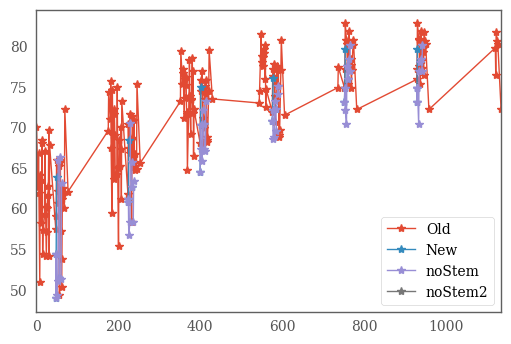

In [10]:
method = 'clustering'
# method = 'LACT'
n_clusters = 20
filter_by_clusters = False

def toPercentge(df):
    df['f-score'] = round(df['f-score'] * 100, 1)
    df['precision'] = round(df['precision'] * 100, 1)
    df['recall'] = round(df['recall'] * 100, 1)
    return df
    
result = toPercentge(pd.read_csv(os.path.join(base_dir, result_files_dir, method+'_accuracy_scores_showcase1.csv'), index_col=0))
result_new = toPercentge(pd.read_csv(os.path.join(base_dir, result_files_dir, method+'_accuracy_scores_showcases.csv'), index_col=0))
result_noStem = toPercentge(pd.read_csv(os.path.join(base_dir, result_files_dir, method+'_accuracy_scores_showcase_noStem.csv'), index_col=0))
result_noStem2 = pd.read_csv(os.path.join(base_dir, result_files_dir, method+'_accuracy_scores_showcase_noStem2.csv'), index_col=0)
result_largeDataset = toPercentge(pd.read_csv(os.path.join(base_dir, result_files_dir, method+'_accuracy_scores_largeDataset.csv'), index_col=0))

if filter_by_clusters:
    result = result[result.n_clusters == n_clusters]
    result_new = result_new[result_new.n_clusters == n_clusters]
    result_noStem = result_noStem[result_noStem.n_clusters == n_clusters]
    result_noStem2 = result_noStem[result_noStem.n_clusters == n_clusters]
    result_largeDataset = result_largeDataset[result_largeDataset.n_clusters == n_clusters]

    
# result.max_df = result.max_df.apply(lambda x: round(x*10)/10)

# result.min_df = result.min_df.apply(lambda x: round(x*10)/10)

result.sort_values('f-score', ascending=False)[:20]
# result.sort_values('precision', ascending=False)[:20]
f_scores = pd.DataFrame(columns=['Old', 'New', 'noStem', 'noStem2'])
f_scores.Old = result['f-score']
f_scores.New = result_new['f-score']
f_scores.noStem = result_noStem['f-score']
f_scores.plot(marker='*')
# result_new
# result
# result_noStem
# result.sort_values('f-score', ascending=False)[:20]
# result_new.sort_values('f-score', ascending=False)[:20]
print(result_noStem2.shape)
result_noStem2.sort_values('f-score', ascending=False)[:20]
# result_largeDataset.sort_values('f-score', ascending=False)


In [11]:
# result_noStem2.query('n_clusters==20 and NUM_TOPICS==50').sort_values('f-score', ascending=False)


In [12]:
# max_df = [0.5, 0.6, 0.7, 0.8, 0.9]
# min_df = [0.05, 0.1, 0.2]


# result.query('max_df==0.5 and NUM_TOPICS==50')

In [13]:
# f_score = result.sort_values('f-score')
# plt.scatter(x=f_score.NUM_TOPICS, y=f_score['f-score'])
# threedee = plt.figure().gca(projection='3d')
# threedee.scatter(f_score.max_df, f_score.min_df, f_score['f-score'])
# threedee.set_xlabel('max_df')
# threedee.set_ylabel('min_df')
# threedee.set_zlabel('f-score')
# plt.show()

In [14]:
def plot_fscore(result, NUM_TOPICS=50, n_clusters=10, legend=True, showTable=False):
    table = pd.DataFrame(index=sorted(result.min_df.unique()), columns=sorted(result.max_df.unique()))
    table.columns.name = 'max_df'
    styles = ['s--','o-.','^-','*:',]
    
    for max_df in table:
        for min_df in table.index:
            try:
                table.ix[min_df, max_df]= \
                 result.query('n_clusters=={} and NUM_TOPICS=={} and max_df=={} and min_df=={}'
                                            .format(n_clusters,NUM_TOPICS, max_df, min_df))['f-score'].values[0]
            except:
                pass

    ax = table.plot(title='# of topics='+str(NUM_TOPICS), kind='line',
                    style=styles, legend=legend, table=showTable, figsize=(5.5,3.5))
    ax.set_xlabel('min_df')
    ax.set_ylabel('F-score (%)')
    ax.set_ylim([0, 100])
    ax.set_xlim([0.04, .41])
    return ax, table

def plot_precision(result, NUM_TOPICS=50, n_clusters=10, legend=True, showTable=False):
    table = pd.DataFrame(index=sorted(result.min_df.unique()), columns=sorted(result.max_df.unique()))
    table.columns.name = 'max_df'
    styles = ['s--','o-.','^-','*:',]

#     table.drop([2.,.11], inplace=True)
    for max_df in table:
        for min_df in table.index:
            try:
                table.ix[min_df, max_df]= \
                 result.query('n_clusters=={} and NUM_TOPICS=={} and max_df=={} and min_df=={}'
                                            .format(n_clusters,NUM_TOPICS, max_df, min_df))['precision'].values[0]
            except:
                pass

    ax = table.plot(title='# of topics='+str(NUM_TOPICS), kind='line', legend=legend,
                    table=showTable, style=styles)
    ax.set_xlabel('min_df')
    ax.set_ylabel('Precision (%)')
    ax.set_ylim([0, 100])
    ax.set_xlim([0.04, .41])
    return ax, table

# 1- The effect of max_df and min_df

/Users/doaa/anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  # Remove the CWD from sys.path while we load stuff.


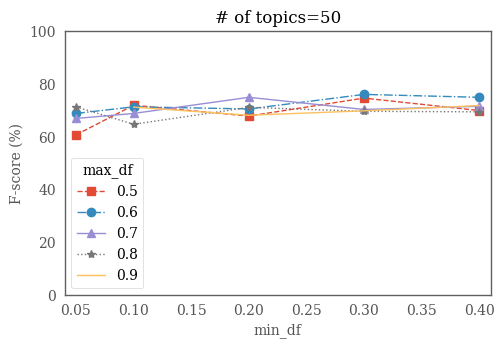

In [15]:
ax, table = plot_fscore(result_noStem2, n_clusters=20, NUM_TOPICS=50, legend=True)
# h, l = ax.get_legend_handles_labels()
# plt.figlegend(h, l, loc='lower center',  ncol=1, bbox_to_anchor=(.8, 0.16))

plt.savefig(fig_base_dir+'min_max_df_50topics.png',  bbox_inches='tight', dpi=200)

In [16]:
table = table.drop(0.05)
table.index.name = 'min_df'
table.columns = pd.MultiIndex.from_tuples(list(zip(['max_df']*5, table.columns)))

table['avg'] = round(table.mean(axis=1))
table['var'] = round(table.var(axis=1))

table.loc['avg'] = round(table.mean(axis=0))
table.loc['var'] = round(table.var(axis=0))

table = table.applymap(round)
# table = table.applymap(int)
table

max_df                         avg var
          0.5   0.6   0.7   0.8   0.9        
min_df                                       
0.1      72.0  71.0  69.0  65.0  71.0  70   7
0.2      68.0  70.0  75.0  71.0  68.0  70   7
0.3      75.0  76.0  70.0  70.0  70.0  72   7
0.4      70.0  75.0  72.0  69.0  72.0  71   4
avg      71.0  73.0  71.0  69.0  70.0  71   6
var       6.0   5.0   5.0   6.0   2.0   1   2

In [17]:
list(zip([1], [3,4]))

[(1, 3)]

#  Precision

/Users/doaa/anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


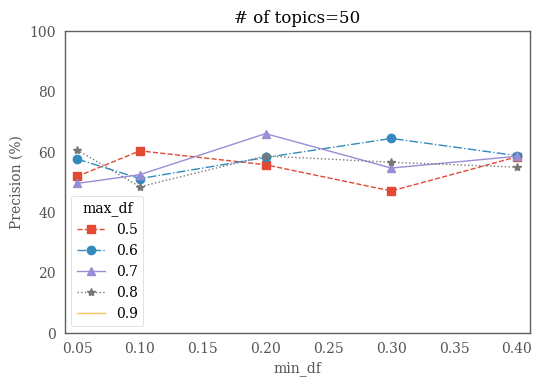

In [18]:
_, table = plot_precision(result_noStem2, NUM_TOPICS=50)

In [19]:
# table['avg'] = table.mean(axis=1)
# table.loc['avg'] = table.mean(axis=0)
# table

In [20]:
# ---------------------------------------------------------

# 2- Minmal Effect of number of Latent Topics

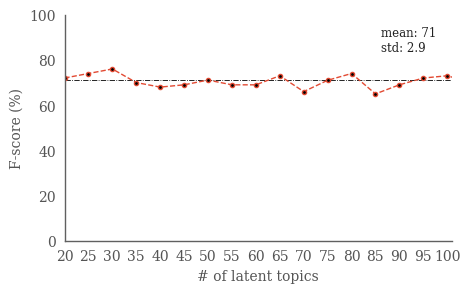

In [21]:
max_df = 0.8
min_df = 0.2
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)
n = [20]#[10, 20, 30, 40, 50]
xmax = 100

for i in n:
    data = result_noStem2.query("n_clusters=={} and max_df =={} and min_df=={}".format(i, max_df, min_df))
    data = data.drop_duplicates(['n_clusters', 'NUM_TOPICS', 'max_df', 'min_df'])
    data.sort_values('NUM_TOPICS', inplace=True)
    plt.plot(data.NUM_TOPICS, data['f-score'], marker='.', ls='--', markersize=6, markerfacecolor='black')
    ax.axhline(y=71, xmin=0, xmax=100, c="black", linestyle='-.', linewidth=0.6, zorder=1)
    if xmax == 100:
        ax.annotate('mean: 71 \nstd: 2.9', xy=(78, 80), xycoords='data', xytext=(28, 6), 
            textcoords='offset points', fontsize=8.5, color='#222222')   # for 20-100
    else: 
        ax.annotate('mean: 71 \nstd: 2.9', xy=(57, 80), xycoords='data', xytext=(28, 6), 
            textcoords='offset points', fontsize=8.5, color='#222222')   # for 20-70
    
    ax.set_xlabel('# of latent topics')
ax.set_ylabel('F-score (%)')
ax.set_ylim([0,100])
ax.set_xlim([23,xmax+1])
ax.set_xticks(np.arange(20,xmax+5,5))
# plt.legend(n, loc='lower right', title='Fixed # of categories')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# ax.set_title('Accuracy for fixed number of clusters (10 clusters)')
plt.savefig(fig_base_dir+'latent_topics_' + str(xmax)+'.png',  bbox_inches='tight', dpi=300)

In [22]:
data.query('NUM_TOPICS<101')['f-score'].describe()

count    17.000000
mean     70.652941
std       2.936434
min      65.000000
25%      69.000000
50%      71.000000
75%      73.000000
max      76.000000
Name: f-score, dtype: float64

# 3- Effect of number of categories (higher the better)

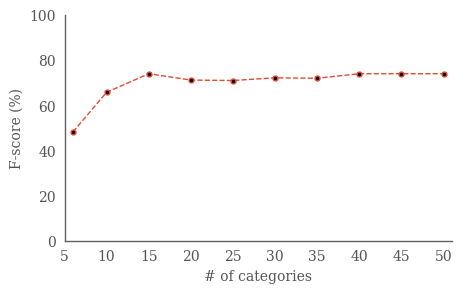

In [23]:
max_df = 0.8
min_df = 0.2
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)
n_topics = [50]#[10, 20, 30, 40, 50]

for i in n_topics:
    data = result_noStem2.query("NUM_TOPICS=={} and max_df =={} and min_df=={} and n_clusters>5".format(i, max_df, min_df))
    data = data.drop_duplicates(['n_clusters', 'NUM_TOPICS', 'max_df', 'min_df'])
    data.sort_values(['n_clusters'], inplace=True)
    plt.plot(data.n_clusters, data['f-score'], marker='.', ls='--', markersize=7, markerfacecolor='black')

    ax.set_xlabel('# of categories')
ax.set_ylabel('F-score (%)')
ax.set_ylim([0,100])
ax.set_xlim([5,51])
ax.set_xticks(np.arange(5,55,5))
# plt.legend(n_topics, loc='lower right', title='Fixed # of latent topics')


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# # Only show ticks on the left and bottom spines
# ax.yaxis.set_ticks_position('left')
# ax.xaxis.set_ticks_position('bottom')

# ax.set_title('Accuracy for fixed number of clusters (10 clusters)')
plt.savefig(fig_base_dir+'num_clusters.png',  bbox_inches='tight', dpi=300)

In [24]:
data.drop_duplicates(['n_clusters', 'NUM_TOPICS', 'max_df', 'min_df'])

,Dataset,n_clusters,NUM_TOPICS,max_df,min_df,precision,recall,f-score
60,showcase_noStem2,6.0,50.0,0.8,0.2,43.4,54.4,48.2
29,showcase_noStem2,10.0,50.0,0.8,0.2,58.7,74.8,65.7
45,showcase_noStem2,15.0,50.0,0.8,0.2,66.3,83.5,73.9
61,showcase_noStem2,20.0,50.0,0.8,0.2,63.5,80.6,71.1
77,showcase_noStem2,25.0,50.0,0.8,0.2,62.7,81.6,70.9
93,showcase_noStem2,30.0,50.0,0.8,0.2,63.5,83.5,72.1
109,showcase_noStem2,35.0,50.0,0.8,0.2,63.1,83.5,71.9
125,showcase_noStem2,40.0,50.0,0.8,0.2,65.1,85.4,73.9
141,showcase_noStem2,45.0,50.0,0.8,0.2,65.1,85.4,73.9
157,showcase_noStem2,50.0,50.0,0.8,0.2,65.1,85.4,73.9


In [25]:
data

,Dataset,n_clusters,NUM_TOPICS,max_df,min_df,precision,recall,f-score
60,showcase_noStem2,6.0,50.0,0.8,0.2,43.4,54.4,48.2
29,showcase_noStem2,10.0,50.0,0.8,0.2,58.7,74.8,65.7
45,showcase_noStem2,15.0,50.0,0.8,0.2,66.3,83.5,73.9
61,showcase_noStem2,20.0,50.0,0.8,0.2,63.5,80.6,71.1
77,showcase_noStem2,25.0,50.0,0.8,0.2,62.7,81.6,70.9
93,showcase_noStem2,30.0,50.0,0.8,0.2,63.5,83.5,72.1
109,showcase_noStem2,35.0,50.0,0.8,0.2,63.1,83.5,71.9
125,showcase_noStem2,40.0,50.0,0.8,0.2,65.1,85.4,73.9
141,showcase_noStem2,45.0,50.0,0.8,0.2,65.1,85.4,73.9
157,showcase_noStem2,50.0,50.0,0.8,0.2,65.1,85.4,73.9


# Similar apps test

In [18]:
import sys
sys.path.append(home_dir)
from SEclassification.LDA.Clustering import Clustering
from SEclassification.LDA.SimilarSoftwareEngine import SimilarSoftwareEngine

/home/doaa/Documents/SEclassification
/home/doaa/Documents/SEclassification
/home/doaa/Documents/SEclassification
/home/doaa/Documents/SEclassification


/home/doaa/anaconda3/lib/python3.4/importlib/_bootstrap.py:321: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  return f(*args, **kwds)


In [20]:
# c = Clustering(NUM_TOPICS=50, max_df=0.5, min_df=0.1, dataset='showcase1')

In [21]:
# c.proj_topic.head()

In [22]:
# c.clusters.head()

In [23]:
# a = c.clusters.index.values


In [24]:
# np.where(a == 'sigma.js')[0][0]

In [3]:
engine = SimilarSoftwareEngine(NUM_TOPICS=50, max_df=0.5, min_df=2, n_clusters=20, dataset='showcase1')
# engine = SimilarSoftwareEngine(NUM_TOPICS=50, max_df=0.9, min_df=0.1, n_clusters=20, dataset='LACT41')

showcase1_50_0.5_2
Project Details shape:  (103, 2)
Topic word raw shape:  (50, 50000)
Project Topic shape:  (103, 50)
Clusters shape:  (103, 54)


In [35]:
def printSimilar(app, top=10):
    res = engine.getSimilarSoftwareApps(app, topSimilar=top)
    c = engine.clustering
    print('query project: ', c.projects_details.loc[app])

    for i in res:
        print(i, c.projects_details.loc[i[1]].group, c.projects_details.loc[i[1]].type)

In [6]:
printSimilar('matplotlib')

query project:  group    Data Visulization
type                Python
Name: matplotlib, dtype: object
(0.00016218225349995397, 'datumbox-framework') Machine Learning Java
(0.95118977838626873, 'raw') Data Visulization JavaScript
(0.95849058721468383, 'envisionjs') Data Visulization JavaScript
(0.96885995933424585, 'pakyow') Web Framework Ruby
(0.9775737734828045, 'adarkroom') Web Games JavaScript
(0.98175770996877698, 'spring') Games Engines C++
(0.98323973750240268, 'textmate') Text Editor C++
(0.98414338686450953, 'Starling-Framework') Games Engines ActionScript
(0.98969006920721359, 'ML_for_Hackers') Machine Learning R
(0.99203443076773423, 'chroma.js') Data Visulization CoffeeScript


In [7]:
printSimilar('Chart.js', top=10)

query project:  group    Data Visulization
type            JavaScript
Name: Chart.js, dtype: object
(0.17296862831530435, '0hh1') Web Games JavaScript
(0.19429805090598939, 'h2o-2') Machine Learning Java
(0.22162495759656198, 'Starling-Framework') Games Engines ActionScript
(0.25097469084195423, 'tensorflow') Machine Learning C++
(0.28159550197504779, 'pakyow') Web Framework Ruby
(0.28853599461033363, 'laravel') Web Framework PHP
(0.29979833558106306, 'convnetjs') Machine Learning JavaScript
(0.52438553441864721, 'cesium') Data Visulization JavaScript
(0.54459058300163976, 'MonoGame') Games Engines C#
(0.55696592079955143, 'django') Web Framework Python


In [8]:
printSimilar('godot')

query project:  group    Games Engines
type                 C
Name: godot, dtype: object
(0.011203259027765422, 'chroma.js') Data Visulization CoffeeScript
(0.13922852901159943, 'slap') Text Editor JavaScript
(0.22642418746858506, 'clumsy-bird') Web Games JavaScript
(0.64774661328247118, '0hh1') Web Games JavaScript
(0.6635182000461407, 'django') Web Framework Python
(0.82530534154083335, 'Ruby-warrior') Machine Learning Ruby
(0.82708940918895657, 'Starling-Framework') Games Engines ActionScript
(0.83050073755300813, 'h2o-2') Machine Learning Java
(0.83250691738594906, 'Leaflet') Data Visulization JavaScript
(0.87464300351557323, 'MonoGame') Games Engines C#


In [9]:
printSimilar('django')

query project:  group    Web Framework
type            Python
Name: django, dtype: object
(0.027010028518776763, 'MonoGame') Games Engines C#
(0.38262389421610177, 'Starling-Framework') Games Engines ActionScript
(0.50252833674768915, '0hh1') Web Games JavaScript
(0.55696592079955143, 'Chart.js') Data Visulization JavaScript
(0.56352593171750986, 'tensorflow') Machine Learning C++
(0.62824699124225147, 'cesium') Data Visulization JavaScript
(0.6635182000461407, 'godot') Games Engines C
(0.66965505620529731, 'h2o-2') Machine Learning Java
(0.68311535592762085, 'clumsy-bird') Web Games JavaScript
(0.74820770792935931, 'dc.js') Data Visulization JavaScript


# Test Find similar apps

In [16]:
df0 = pd.read_csv(base_dir + '/config/less_than_10k_projects.txt', header=None)
df = df0.applymap(lambda x: x.split('./')[-1])
df = df.applymap(lambda x: x.split('_final-processed_no_stem.out')[0])
df.to_csv(base_dir + '/config/less_than_10k_projects_names.txt', index=False, header=False)

In [22]:
df0 = pd.read_csv('/research/doaa2012/SEclassification/results/largeDataset/projects_details.csv')
df0 = df0.drop('removed', axis=1)
df0.to_csv('/research/doaa2012/SEclassification/results/largeDataset/projects_details.csv', index=False)

In [9]:
np.unique(engine.clustering.projects_details.language).shape
# engine.clustering.projects_details.language

(19,)

In [40]:
# Read new big test data

In [2]:
from os import listdir
from os.path import isfile, join

dataset_path = 'results/largeDataset'
conf_path = 'config'

# files = [f for f in listdir(dataset_path) if isfile(join(dataset_path, f)) and f.split('.')[-1]=='csv']
# print(files)
# largeDataset = pd.DataFrame()
# for file in files:
#     print(file)
#     temp = pd.read_csv(join(dataset_path, file), sep='\t')
#     temp['group'] = file.split('.')[0]
#     largeDataset = largeDataset.append(temp) #temp.iloc[:700]
# largeDataset.to_csv(join(conf_path, 'largeDataset_config.csv'), index=False)


largeDataset = pd.read_csv(join(conf_path, 'largeDataset_config.csv'))

print(largeDataset.shape)
largeDataset.head()

(9007, 10)


,name,full_name,id,description,language,size,watchers,forks,stargazers_count,group
0,express,expressjs/express,237159.0,"Fast, unopinionated, minimalist web framework ...",JavaScript,13746.0,27387.0,5113.0,27387.0,web framework
1,django,django/django,4164482.0,The Web framework for perfectionists with dead...,Python,198635.0,21196.0,8551.0,21196.0,web framework
2,tornado,tornadoweb/tornado,301742.0,Tornado is a Python web framework and asynchro...,Python,10587.0,12090.0,3705.0,12090.0,web framework
3,martini,go-martini/martini,13975314.0,Classy web framework for Go,Go,820.0,8732.0,915.0,8732.0,web framework
4,beego,astaxie/beego,3577919.0,"beego is an open-source, high-performance web ...",Go,8829.0,8118.0,2010.0,8118.0,web framework


# Correlations

In [3]:
print('Correlation between Number of stars and forks: ++++++++++++')
np.corrcoef(largeDataset.stargazers_count.fillna(0), largeDataset.forks.fillna(0))[0,1]

Correlation between Number of stars and forks: ++++++++++++


0.84338428604552584

In [4]:
print('Data size: {0:.2f} GB'.format(largeDataset['size'].sum()/1024/1024,))

Data size: 182.02 GB


In [5]:
print('Correlation between Number of stars and size: nooooooooooooooo')
np.corrcoef(largeDataset.stargazers_count.fillna(0), largeDataset['size'].fillna(0))[0,1]

Correlation between Number of stars and size: nooooooooooooooo


0.085718379792928512

# Stars

(4008, 10)
starts count     4008.000000
mean       483.454591
std       1535.917776
min         41.000000
25%         69.000000
50%        126.000000
75%        307.250000
max      31837.000000
Name: stargazers_count, dtype: float64


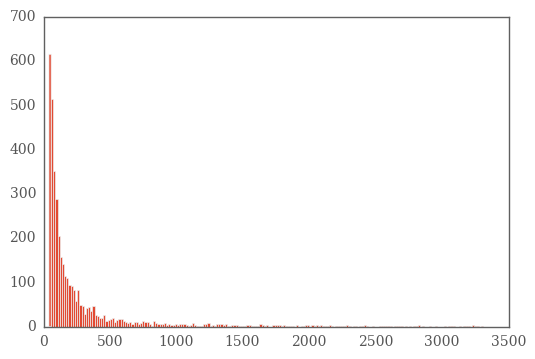

In [6]:
stars_1 = largeDataset.sort_values('stargazers_count')
stars_1 = stars_1[stars_1.stargazers_count>40]
print(stars_1.shape)
print('starts', stars_1.stargazers_count.describe())
stars_1.stargazers_count[:-100].hist(bins=200)

In [7]:
groups = largeDataset.groupby('language')

for i, g in groups:
    print('Language: ', i, g['size'].describe())
    print('----------------------------')

Language:  10 count     1.0
mean     51.0
std       NaN
min      51.0
25%      51.0
50%      51.0
75%      51.0
max      51.0
Name: size, dtype: float64
----------------------------
Language:  12 count     1.0
mean     42.0
std       NaN
min      42.0
25%      42.0
50%      42.0
75%      42.0
max      42.0
Name: size, dtype: float64
----------------------------
Language:  13 count     1.0
mean     30.0
std       NaN
min      30.0
25%      30.0
50%      30.0
75%      30.0
max      30.0
Name: size, dtype: float64
----------------------------
Language:  168 count      1.0
mean     315.0
std        NaN
min      315.0
25%      315.0
50%      315.0
75%      315.0
max      315.0
Name: size, dtype: float64
----------------------------
Language:  20 count      1.0
mean     114.0
std        NaN
min      114.0
25%      114.0
50%      114.0
75%      114.0
max      114.0
Name: size, dtype: float64
----------------------------
Language:  ABAP count        1.0
mean     11900.0
std          NaN
min   

# Languages 

In [8]:
ext= {
    "CoffeeScript": ".coffee",
    "JavaScript": ".js",
    "Java": ".java",
    "VimL": ".eml",
    "Clojure": ".clj",
    "Emacs Lisp": ".vlx",
    "Python": ".py",
    "C++": [".cc", ".cpp"],
    "C": ".c",
    "C#": ".cs",
#     "CSS": ".css",
#    "HTML": ".html",
    "Objective-C": ".m",
    "Ruby": ".rb",
    "Haskell": ".gp",
    "R": ".R",
    "Go": ".go",
    "Scala": ".scala",
    "D": ".d",
    "TypeScript": ".ts",
    "ActionScript": ".as",
    "PHP": ".php"
}
ext = list(ext.keys())

# counts = largeDataset.language.value_counts()

print('# Supported Languages: ', len(ext))
proj_top_lang = largeDataset[largeDataset.language.isin(ext)]
print('Projects with supported languages', proj_top_lang.shape[0])

# df = pd.DataFrame()
# df['Language count'] = counts
# df['InOurApp'] = counts.index.isin(ext)
# df
counts = proj_top_lang.language.value_counts()

counts[counts.index.isin(ext)] # projects per language


# Supported Languages:  20
Projects with supported languages 7234


JavaScript      2276
Python          1059
Java             714
C++              520
Ruby             399
C                394
PHP              348
C#               307
Objective-C      262
Go               254
CoffeeScript     139
Scala            127
Clojure          100
Haskell           84
R                 69
ActionScript      57
TypeScript        45
VimL              33
D                 32
Emacs Lisp        15
Name: language, dtype: int64

In [9]:
# Languages with few projects
min_projects_per_lang = 40
print(counts[(counts>min_projects_per_lang).nonzero()[0]].sum())
print(counts[(counts>min_projects_per_lang).nonzero()[0]].shape)
lang_to_remove = counts[(counts<min_projects_per_lang).nonzero()[0]].index.values
print(lang_to_remove)
counts[(counts>min_projects_per_lang).nonzero()[0]]

7154
(17,)
['VimL' 'D' 'Emacs Lisp']


JavaScript      2276
Python          1059
Java             714
C++              520
Ruby             399
C                394
PHP              348
C#               307
Objective-C      262
Go               254
CoffeeScript     139
Scala            127
Clojure          100
Haskell           84
R                 69
ActionScript      57
TypeScript        45
Name: language, dtype: int64

In [10]:
proj_top_lang = proj_top_lang[~proj_top_lang.language.isin(lang_to_remove)]

In [11]:
proj_top_lang.shape

(7154, 10)

In [12]:
proj_top_lang.language.value_counts()

JavaScript      2276
Python          1059
Java             714
C++              520
Ruby             399
C                394
PHP              348
C#               307
Objective-C      262
Go               254
CoffeeScript     139
Scala            127
Clojure          100
Haskell           84
R                 69
ActionScript      57
TypeScript        45
Name: language, dtype: int64

# Filter by size

In [13]:
proj_top_lang.shape

(7154, 10)

In [14]:
sizeFilter = proj_top_lang[proj_top_lang['size']>250]
sizeFilter.shape

(5399, 10)

# Filter by stars

In [15]:
# proj_top_lang[proj_top_lang.stargazers_count>15].shape
sizeFilter[sizeFilter.stargazers_count>10].shape

(4053, 10)

In [16]:
sizeFilter.language.value_counts()

JavaScript      1707
Python           714
Java             607
C++              455
C                334
C#               276
Ruby             236
PHP              234
Objective-C      222
Go               164
Scala            103
CoffeeScript      77
Haskell           63
Clojure           62
R                 57
ActionScript      50
TypeScript        38
Name: language, dtype: int64

In [17]:
sizeFilter.to_csv('filtered_largeDataset_18lang_250k_10stars.csv', index=False)

# -------------------------------------------------------------------------------------------

# create category matrices

In [259]:
d = pd.read_csv('/research/doaa2012/SEclassification/LACT2009/msr09-data/41_projects_details.csv', sep=',')
d.fillna('', inplace=True)
d.set_index('index', inplace=True)
d = d.applymap(lambda x: x.lstrip())
print(d.head())
all_cat = set(d.Cat1.values).union(d.Cat2.values)
# all_cat = {i.lstrip() for i in all_cat}
all_cat.remove('')
cat_df = pd.DataFrame(columns=all_cat)
for proj in d.index:
    for cat in cat_df:
        if cat in d.loc[proj].values:
            cat_df.loc[proj, cat] = 1
cat_df.fillna(0, inplace=True)
#delete categories with only one app


for cat in cat_df:
    if cat_df[cat].sum() == 1:
        del cat_df[cat]
print(cat_df.sum())
cat_df.to_csv('/research/doaa2012/SEclassification/LACT2009/msr09-data/LACT41_projects_categories_sourceForge.csv')
cat_df.to_csv('/research/doaa2012/SEclassification/results/LACT41/LACT41_projects_categories.csv')

print(cat_df.shape)

                    group type                              Cat1                       Cat2                 Cat3
index                                                                                                           
bingo-cards     boardgame    c  Computer Aided Instruction (CAI)                                                
btechmux-1.4.3  boardgame    c                       Board Games  Multi-User Dungeons (MUD)           Simulation
cinag-1.1.4     boardgame    c           Artificial Intelligence                Board Games  Turn Based Strategy
faile_1_4_4     boardgame    c           Artificial Intelligence                Board Games  Turn Based Strategy
gbatnav-1.0.4   boardgame    c                       Board Games                                                
xterm                        2
Gnome                        5
Conversion                   4
Board Games                 12
Artificial Intelligence      3
Database Engines/Servers     7
Turn Based Strategy    

In [260]:
d = pd.read_csv('/research/doaa2012/SEclassification/LACT2009/msr09-data/43_projects_details.csv', sep=',')
d.set_index('index', inplace=True)
print(d.head())
all_cat = set(d.group.values)
cat_df = pd.DataFrame(columns=all_cat)
for proj in d.index:
    for cat in cat_df:
        if cat in d.loc[proj].values:
            cat_df.loc[proj, cat] = 1
cat_df.fillna(0, inplace=True)
#delete categories with only one app
for cat in cat_df:
    if cat_df[cat].sum() == 1:
        del cat_df[cat]
print(cat_df.sum())
cat_df.to_csv('/research/doaa2012/SEclassification/LACT2009/msr09-data/LACT43_projects_categories.csv')
cat_df.to_csv('/research/doaa2012/SEclassification/results/LACT43/LACT43_projects_categories.csv')

print(cat_df.shape)

                   group type
index                        
gib-0.2             chat    c
hotpop3.0.0.1      email    c
jwsmtp-1.32.15     email    c
anyterm-1.0.1   terminal    c
cgterm-1.6      terminal    c
terminal    8
database    5
email       8
chat        4
game        9
editor      9
dtype: int64
(43, 6)


In [263]:

d = pd.read_csv('/research/doaa2012/SEclassification/results/showcase1/projects_details.csv', sep=',')
d.set_index(d.columns[0], inplace=True)
print(d.head())
all_cat = set(d.group.values)
cat_df = pd.DataFrame(columns=all_cat)
for proj in d.index:
    for cat in cat_df:
        if cat in d.loc[proj].values:
            cat_df.loc[proj, cat] = 1
cat_df.fillna(0, inplace=True)
#delete categories with only one app
for cat in cat_df:
    if cat_df[cat].sum() == 1:
        del cat_df[cat]
print(cat_df.sum())
cat_df.to_csv('/research/doaa2012/SEclassification/results/showcase1/showcase1_projects_categories.csv')
print(cat_df.shape)

                                group         type
Unnamed: 0                                        
0hh1                        Web Games   JavaScript
2048                        Web Games          CSS
AtomicGameEngine        Games Engines            C
BEMSimpleLineGraph  Data Visulization  Objective-C
BrowserQuest                Web Games   JavaScript
Web Games             7
Games Engines        20
Text Editor          12
Data Visulization    22
Machine Learning     26
Web Framework        16
dtype: int64
(103, 6)


In [18]:

d = pd.read_csv('/research/doaa2012/SEclassification/results/largeDataset/projects_details.csv', sep=',')
# d.set_index(d.columns[0], inplace=True)
print(d.head())
all_cat = set(d.group.values)
cat_df = pd.DataFrame(columns=all_cat)
for proj in d.index:
    for cat in cat_df:
        if cat in d.iloc[proj].values:
            cat_df.loc[proj, cat] = 1
            cat_df.loc[proj, 'name'] = d.iloc[proj]['name']
cat_df.fillna(0, inplace=True)
# #delete categories with only one app
# for cat in cat_df:
#     if cat_df[cat].sum() == 1:
#         del cat_df[cat]
print(cat_df.sum())
cat_df.to_csv('/research/doaa2012/SEclassification/results/largeDataset/largeDataset_projects_categories.csv', index_col=None)
print(cat_df.shape)

      name           full_name          id                                        description    language      size  watchers   forks  stargazers_count          group  removed
0  express   expressjs/express    237159.0  Fast, unopinionated, minimalist web framework ...  JavaScript   13746.0   27387.0  5113.0           27387.0  web framework        0
1   django       django/django   4164482.0  The Web framework for perfectionists with dead...      Python  198635.0   21196.0  8551.0           21196.0  web framework        0
2  tornado  tornadoweb/tornado    301742.0  Tornado is a Python web framework and asynchro...      Python   10587.0   12090.0  3705.0           12090.0  web framework        0
3  martini  go-martini/martini  13975314.0                        Classy web framework for Go          Go     820.0    8732.0   915.0            8732.0  web framework        0
4    beego       astaxie/beego   3577919.0  beego is an open-source, high-performance web ...          Go    8829.0    8

In [36]:
print(d.shape)# cat_df.shape
np.unique(d['name'], return_counts=True)[1]
# dd = pd.read_csv(base_dir+'/results/largeDataset/topic_word_raw_largeDataset_50_0.5_0.05.csv')
# dd = pd.read_csv(base_dir+'/results/largeDataset/topic_word_raw_largeDataset_50_0.5_0.02.csv')
dd = pd.read_csv(base_dir+'/results/showcase_noStem2/topic_word_raw_showcase_noStem2_50_0.8_0.2.csv')

dd.shape

(5220, 11)


(50, 6997)

In [231]:
threshold = 0.0001
project_cat = pd.read_csv(os.path.join(base_dir, 'results', 'LACT41', 'project_cat_LACT41_60_0.7_0.1.csv'), index_col=0)
# project_cat.clip_lower(threshold).replace(threshold, 0).astype(bool)

In [234]:
project_cat.columns

Index(['Board Games', 'Board Games.1', 'Compilers', 'xterm', 'Cross Compilers', 'Text Editors', 'Database Engines/Servers', 'Conversion', 'Database Engines/Servers.1', 'Board Games.2', 'Database Engines/Servers.2', 'Compilers.1', 'Turn Based Strategy'], dtype='object')

In [236]:
result.query('NUM_TOPICS==60')

,Dataset,NUM_TOPICS,max_df,min_df,precision,recall,f-score
100,LACT41,60.0,0.5,0.02,-1.000000,-1.000000,-1.000000
101,LACT41,60.0,0.5,0.05,0.666086,0.630081,0.647584
102,LACT41,60.0,0.5,0.10,-1.000000,-1.000000,-1.000000
103,LACT41,60.0,0.5,0.20,-1.000000,-1.000000,-1.000000
104,LACT41,60.0,0.5,0.30,-1.000000,-1.000000,-1.000000
105,LACT41,60.0,0.6,0.02,-1.000000,-1.000000,-1.000000
106,LACT41,60.0,0.6,0.05,-1.000000,-1.000000,-1.000000
107,LACT41,60.0,0.6,0.10,0.479094,0.491870,0.485398
108,LACT41,60.0,0.6,0.20,0.605691,0.483740,0.537890
109,LACT41,60.0,0.6,0.30,0.503484,0.520325,0.511766


# Unique languages

In [28]:
print('showcases')
d = pd.read_csv('/research/doaa2012/SEclassification/config/showcases_config.csv')
d.language.unique().shape

showcases


(19,)

In [29]:
print('largeDataset')
d = pd.read_csv('/research/doaa2012/SEclassification/config/largeDataset_config_filtered_final.csv')
d.language.unique().shape

largeDataset


(17,)

In [31]:
d.group.unique()

array(['web framework', 'text editor', 'compiler', 'machine learning',
       'chatting', 'database', 'game engine', 'mobile app', 'visualization'], dtype=object)

# Dendrograms

In [127]:
from scipy.cluster import hierarchy
import scipy
import matplotlib.pyplot as plt

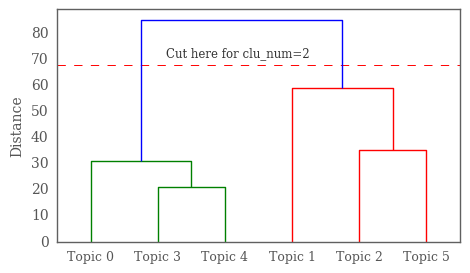

In [135]:
ytdist = np.array([85., 56., 25., 31., 73., 59., 46., 25.,
                   40., 65., 56., 35., 21., 45., 55.])
Z = hierarchy.linkage(ytdist, 'complete')
_, ax = plt.subplots(1, figsize=(5.2, 3))
# ax = plt.subplot()

h = hierarchy.dendrogram(Z, labels=['Topic '+str(i) for i in range(6)], leaf_font_size=9)


ax.axhline(y=68, xmin=0, xmax=100, c="red", linestyle='--', linewidth=0.7, zorder=1)
ax.annotate('Cut here for clu_num=2', xy=(10.5, 68), xycoords='data', xytext=(28, 6), 
            textcoords='offset points', fontsize=8.5, color='#333333')
ax.set_ylabel('Distance')
plt.savefig(fig_base_dir+'dendrogram.png',  bbox_inches='tight', dpi=200)

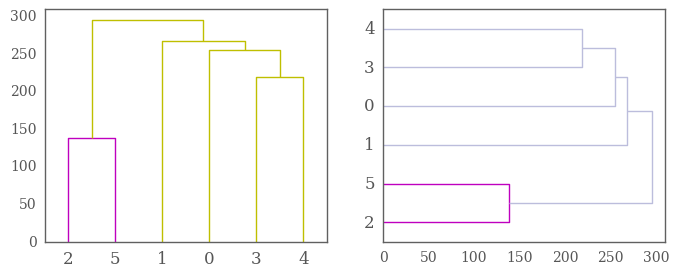

In [27]:
hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
dn1 = hierarchy.dendrogram(Z, ax=axes[0], above_threshold_color='y',
                           orientation='top')
dn2 = hierarchy.dendrogram(Z, ax=axes[1], above_threshold_color='#bcbddc',
                           orientation='right')
hierarchy.set_link_color_palette(None)  # reset to default after use


'0.18.1'